- Charakteristiky signálu v časové oblasti
  - perioda, amplituda, trend, **práce signálu, energie** aj.
  - modulace signálu

$E_c$ - energie spojitého signálu $x(t)$

$$E_c = \left< x(t),x(t)\right> = \int_{-\infty}^{\infty} \left| x(t)\right|^2 {\rm d}t$$

$E_s$ - energie diskrétního signálu $x(n)$

$$E_s = \left< x(n),x(n)\right> = ??$$

- Nagenerujte periodický signál s náhodnou složkou a spočítejte jeho 
  - základní charakteristiky (amplituda, střední hodnota, rozptyl apod.)
  - trend signálu
  - celkovou energii 
  - celkový výkon signálu

In [2]:
from argparse import FileType
from random import random
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import time

def MujSignal(x,n_length, f, tvec):
    x = np.sin(2*np.pi*f*tvec)
    return np.array(x)

def ErrPart(Err,Amp, n_length):
    Err = Amp*np.random.rand(n_length);
    return np.array(Err)


In [ ]:

#-------------------declaration of variables---------------------
n_length = 50;
f = 1;
T=1/f;
Tmax = 10*T;
Amp=0.05;
tvec = np.linspace(0,Tmax,n_length);
x = np.zeros(n_length);
Err=np.zeros(n_length);

#---------------------------calculation------------------------
x = MujSignal(x,n_length,f,tvec)  + ErrPart(Err,Amp, n_length) + 0.0*tvec #- Amp/3.
plt.plot(tvec,x);

def FitFun(x,y0,a,):
    return y0+a*x

[Kparam,covMatrix] = sp.optimize.curve_fit(FitFun,tvec,x)

#print(Kparam)

#plt.plot(tvec,FitFun(tvec,Kparam[0],Kparam[1]));


# partial amplitude

Avec = np.reshape(x,[10,5])
print(Avec)
AmpPartial=np.sum(Avec,axis=1);
print("")
print(AmpPartial)
AmpPartial=AmpPartial/5
print(AmpPartial)




$E_s$ - energie diskrétního signálu $x(n)$

$$E_s = \left< x(n),x(n)\right> = \sum_{n=1}^N \left| x(n)\right|^2$$

In [ ]:
def SignalEnergyCalc(tvec,signal,n_length):
    Es=np.sum(np.abs(signal)**2.)
    return Es

Es = SignalEnergyCalc(tvec,x,n_length)
print(Es)

**Výkon signálu**
-   vzorek signálu přes definovaný časový úsek (počet vzorků) $t \rightarrow N$ 
-   spočítat energii signálu $E_c(t) \rightarrow E_s(N) $ 

$$P_c = \lim_{t \rightarrow \infty}\frac{E_c(t)}{t} = \lim_{t \rightarrow \infty}\frac{\int_{-\infty}^{\infty} \left| x(t)\right|^2 {\rm d}t}{t}$$   
$$P_s = \lim_{N \rightarrow \infty}\frac{E_s(N)}{N} = \lim_{N \rightarrow \infty}\frac{\sum_{n=1}^N \left| x(n)\right|^2}{N}$$   

-   Jaký bude průběh veličiny $E_s$ se zvyšujícícm se počtem vzorků $N$ ?
-   Jaký bude průběh veličiny $P_s$ se zvyšujícícm se počtem vzorků $N$ ?

In [ ]:
Ps = Es/n_length
print(Ps)

#consider only half of the signal
nmax=int(np.floor(n_length/2.))
Ps = SignalEnergyCalc(tvec,x[1:nmax],nmax)/nmax
print(Ps)

**Modulace signálu**
- amplitudová modulace
  - nosná vlna signálu $$f(t) = A_0 \sin(\omega t) $$
  - Modulační signál   $$m(t) = M\sin(\phi t + \epsilon)$$
  - Modulace amplitudy: $A = A_0 + m(t)$
  - Výsledný modulovaný signál $$f_m(t) = \left(  A_0 + M\sin(\phi t + \epsilon)\right) \sin(\omega t)$$

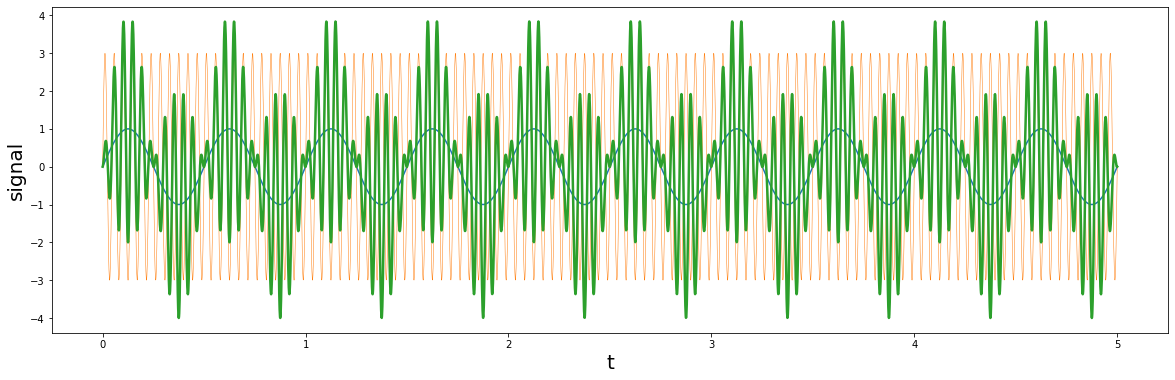

In [5]:
def NosnaVlna(A0,f,n_length,tvec):
    x = A0*np.sin(2*np.pi*f*tvec)
    return np.array(x)

def ModulacniVlna(M,phi,n_length,tvec):
    m = M*np.sin(2*np.pi*phi*tvec)
    return np.array(m)
#def params

numT=10;

f = 2;
A0=1;
T=1/f;
Tmax = numT*T;
n_length=5000;
tvecx = np.linspace(0,Tmax,n_length);

x = NosnaVlna(A0,f,n_length,tvecx);

phi = 22;
M=3;
T=1/f;
Tmax = numT*T;
n_length=5000;
tvecm = np.linspace(0,Tmax,n_length);

m = ModulacniVlna(M,phi,n_length,tvecm)

y=NosnaVlna(A0+m,f,n_length,tvecm);


plt.rcParams["figure.figsize"] = (20,6)
plt.plot(tvecx,x, linewidth=1.5);
plt.plot(tvecm,m, linewidth=0.5);
plt.plot(tvecm,y, linewidth=2.5);
plt.xlabel("t",fontsize=20)
plt.ylabel("signal",fontsize=20)
plt.show();


**Modulace signálu**
- frekvenční modulace
  - napište program pro frekvenční modulaci signálu 
  - vykreslete nosný, modulační i modulovaný signál